### SQL-Abfragen in Relationale Algebra konvertieren

Projection
    Selection
        CrossProduct
            ThetaJoin
                Relation
                Relation
            SubqueryScan
                Projection
                    GroupBy
                        ThetaJoin
                            ThetaJoin
                                Relation
                                Relation
                            Relation


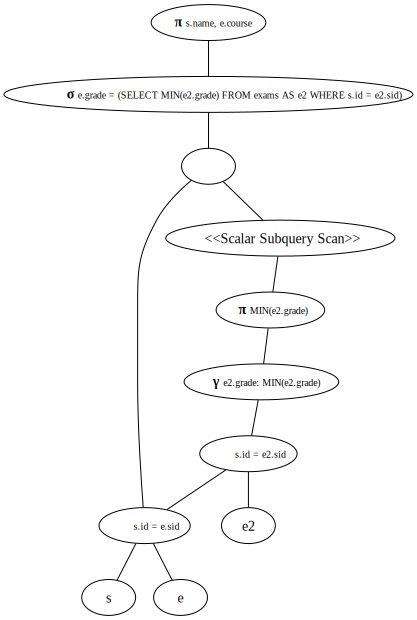

In [5]:
from postbound.vis import optimizer as opt_vis

from src.parser.parser import Parser

parser = Parser()
sql_query = "select student.id, student.name from student where student.country ='germany'"
sql_query_join = "SELECT employee.name, department.name FROM employee, department WHERE employee.dept_id = department.id AND employee.age > 30"
sql_query_join_2 = "SELECT a.id, b.name, c.price, d.year FROM a, b, c, d WHERE a.id = b.a_id AND b.id = c.b_id AND b.id = d.b_id AND a.id = c.a_id and a.name = 'lee'"
sql_query_groupby = "SELECT employees.department, COUNT(employees.employee_id) FROM employees, departments where employees.department_id = departments.id GROUP BY employees.department, employees.year"

sql_query_1 = "select s.name,e.course from exams e, students s where s.id = e.sid and e.grade = (select min(e2.grade) from exams e2 where s.id = e2.sid);"

relalg_query = parser.parse_relalg(sql_query)
relalg_query_join = parser.parse_relalg(sql_query_join)
relalg_query_join_2 = parser.parse_relalg(sql_query_join_2)
relalg_query_groupby = parser.parse_relalg(sql_query_groupby)
relalg_query_1 = parser.parse_relalg(sql_query_1)

print(parser.str_relalg(relalg_query_1))
opt_vis.plot_relalg(relalg_query_1)

### Optimierung?

In [8]:
from src.optimizer.optimizer import Optimizer

optimizer = Optimizer()
print(optimizer.optimize_unnesting(relalg_query_1).node_type)

SubqueryScan
